# Question:
Go to this given URL and solve the following questions<br>
URL: https://www.youtube.com/@PW-Foundation/videos<br>
Q1. Write a python program to extract the video URL of the first five videos.<br>
Q2. Write a python program to extract the URL of the video thumbnails of the first five videos.<br>
Q3. Write a python program to extract the title of the first five videos.<br>
Q4. Write a python program to extract the number of views of the first five videos.<br>
Q5. Write a python program to extract the time of posting of video for the first five videos.<br>
Note: Save all the data scraped in the above questions in a CSV file.<br>

## Answer:
**Note: Scraping requrired data from YouTube was not possible with BeautifulSoup so I had to use another python package called Selenium.** 

### Code for Scrapping the Data and Storing it in a CSV:

In [ ]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import time
import pandas as pd

PATH = "C:\Program Files (x86)\chromedriver.exe"
driver = webdriver.Chrome(PATH)

def lauchpage():
	driver.get("https://www.youtube.com/@PW-Foundation/videos")

	try:
		vid_details = WebDriverWait(driver,10).until(
			EC.presence_of_element_located((By.ID, "contents"))
			)
	except:
		driver.quit()
	return vid_details.text
#######################################################################

vid_info = lauchpage()

data_dict = {}
line_num = 1
all_lines=[]

for line in vid_info.split('\n'):
	if ':' in line:
		pass
	else:
		all_lines.append(line)

for line in all_lines:
    if line_num % 3 == 1:
        record_dict = {}

    if line_num % 3 == 1:
        record_dict['title'] = line

    elif line_num % 3 == 2:
        record_dict['views'] = line

    elif line_num % 3 == 0:
        record_dict['posting_time'] = line
        data_dict[len(data_dict)] = record_dict

    line_num+=1

df = pd.DataFrame.from_dict(data_dict, orient='index')
df.to_csv('pwskills_youtube_vid_details.csv')

Link to the csv file: https://github.com/liskibruh/youtube-scraper/blob/main/pwskills_youtube_vid_details.csv <br>
**Here's how the data looks in the csv file:** 

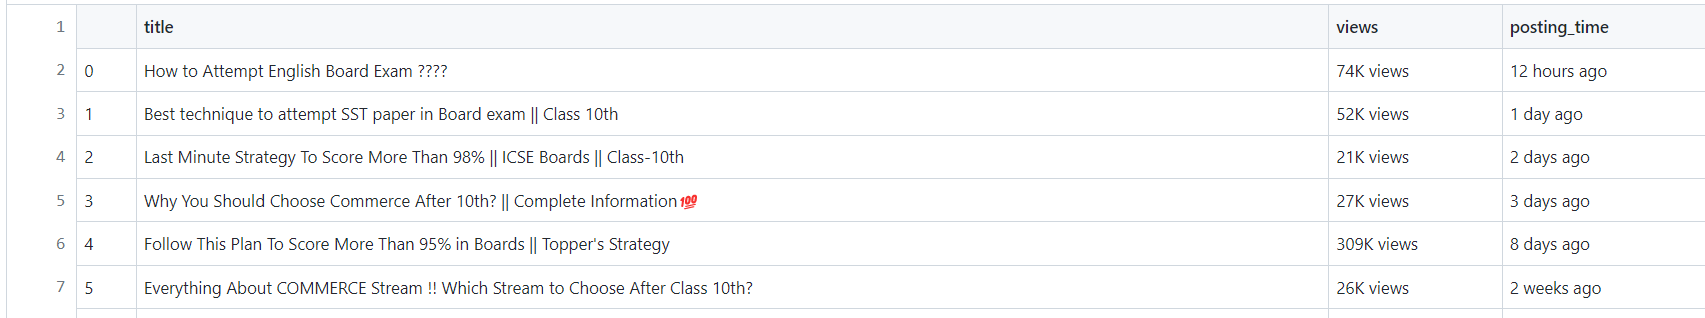

**I forgot to scrap the video links as well and by the time i realized, i was too far in to the project and i would have to do everything from the start if i wanted to scrap the links as well.<br>
As for the video thumbnails, i was unable to scrap them but i am pretty sure if i spent more time on it i will eventually figure it out.**

### Code for Flask Front-End:
**application.py**

In [ ]:
from flask import Flask, render_template
from flask_cors import CORS,cross_origin
import csv

application = Flask(__name__)
app=application


csv_filename = 'pwskills_youtube_vid_details - Copy.csv'

details=[]

with open(csv_filename,'r') as data:
   for line in csv.reader(data):
        mydict = {"Index": line[0], "Title": line[1], "Views": line[2], "Time_since_posted": line[3]}
        details.append(mydict)


@app.route("/")
@cross_origin()
def home():
	return render_template('home2.html',details=details)

if __name__=="__main__":
    app.run(host='127.0.0.1', port=8000, debug=True)
	#app.run(debug=True)

**.html**

In [ ]:
<!DOCTYPE html>
<html>
<head>
	<meta charset="utf-8">
	<meta name="viewport" content="width=device-width, initial-scale=1">
	<title></title>
</head>
<body>

	<table cellspacing="0">
      <tr>
         <th>Index</th>
         <th>Title</th>
         <th>Views</th>
         <th>Time Since Posted</th>
      </tr>
         {% for detail in details %}
      <tr>
          <td>{{detail.Index}}</td>
         <td>{{detail.Title}}</td>
         <td>{{detail.Views}}</td>
         <td>{{detail.Time_since_posted}}</td>
       	 {% endfor %}
   </table>

</body>
</html>

# App running on my Local Computer

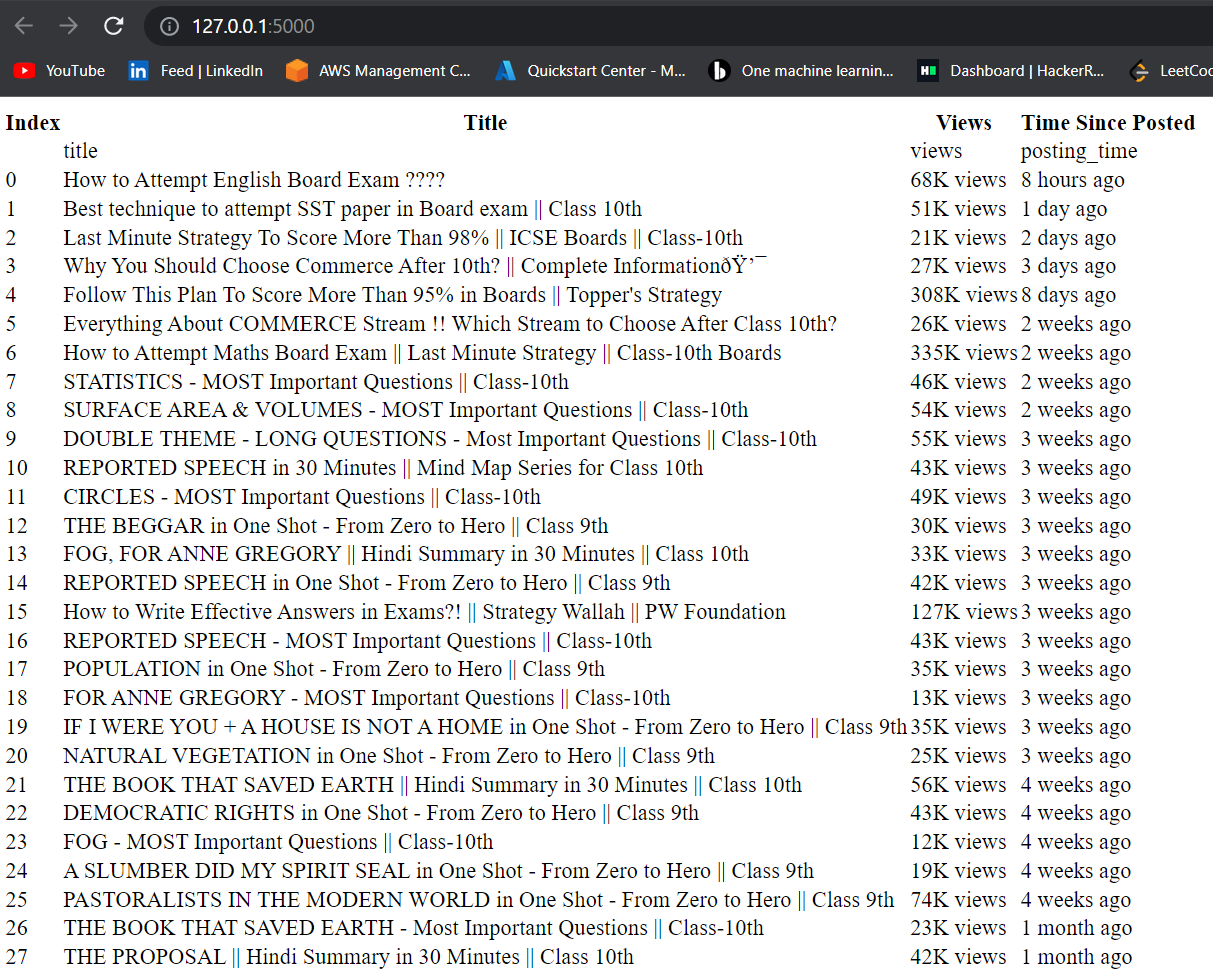

# App Running on AWS Cloud

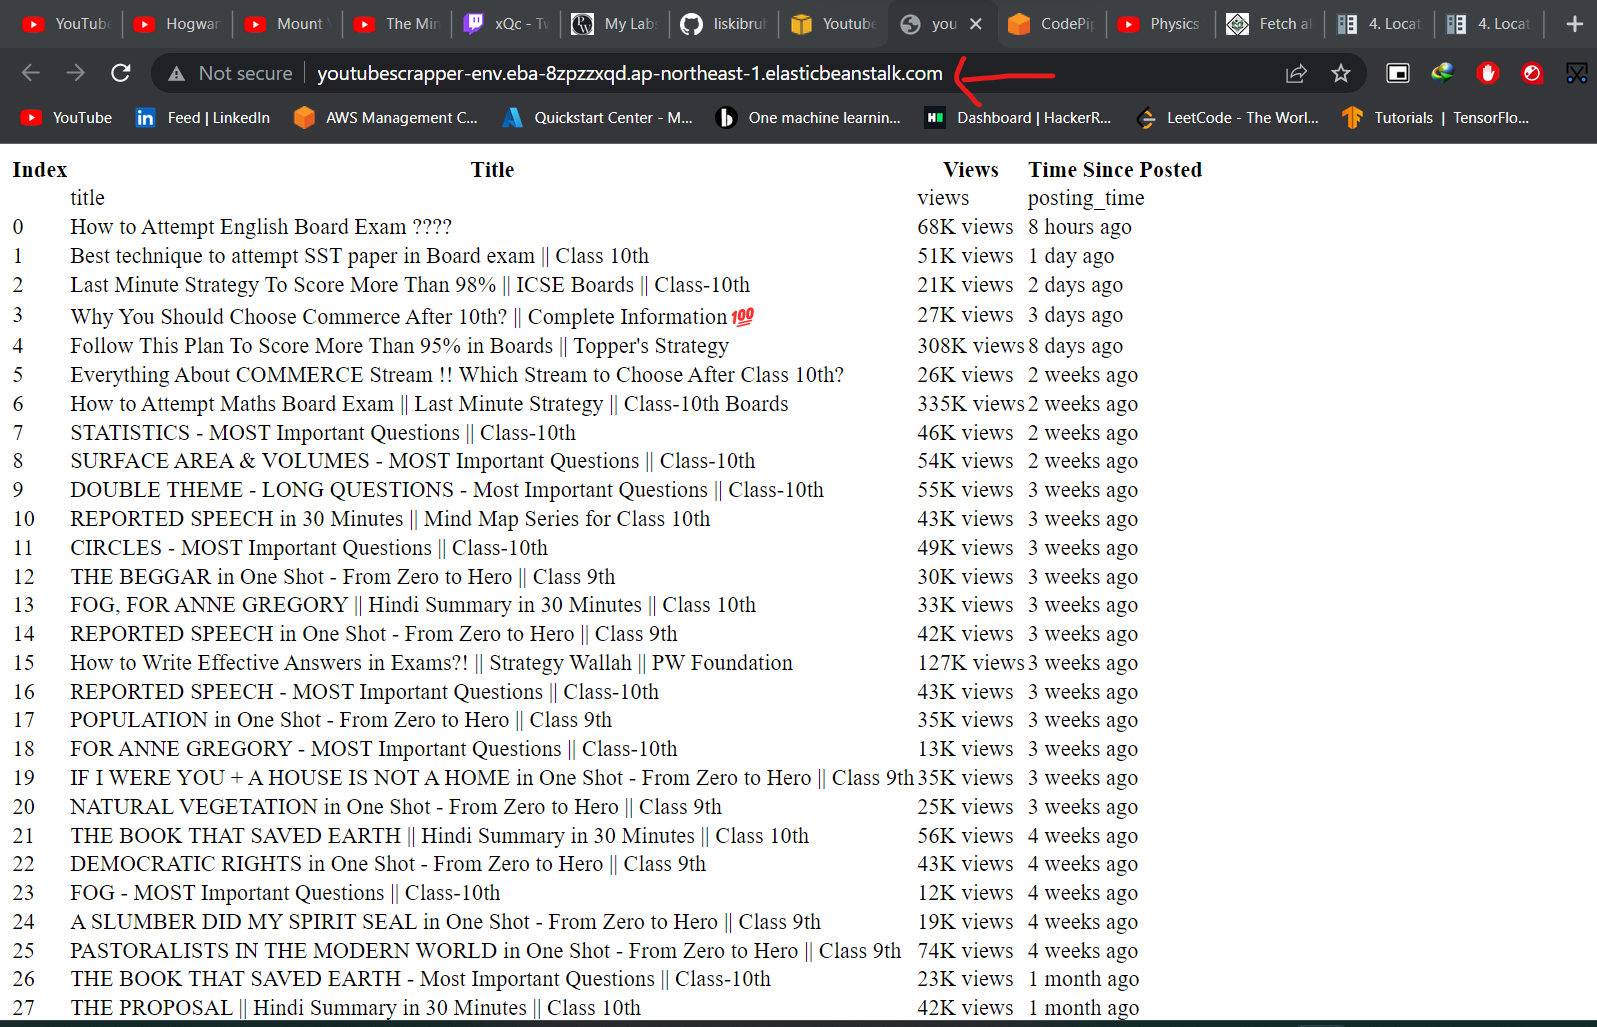

### Link to the GitHub Repo of the project: 
It contains all the files and everything regarding this project<br>
**https://github.com/liskibruh/youtube-scraper**

### I know this was a very beginner level project with Flask and AWS but I spent 2 days and like 20 hours preparing it so please be generous while marking this assignemnt. 
### Thank you